<a href="https://colab.research.google.com/github/SidrahAaishah/Ml-practice/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import datasets

In [ ]:
from sklearn.datasets import fetch_california_housing
housing_dataset = fetch_california_housing()

In [ ]:
housing_dataset

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [ ]:
housing_dataframe = pd.DataFrame(housing_dataset.data,columns = housing_dataset.feature_names)

In [ ]:
housing_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
housing_dataframe['target'] = housing_dataset.target

In [ ]:
housing_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
housing_dataframe.shape

(20640, 9)

In [ ]:
housing_dataframe.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
target,0


In [ ]:
housing_dataframe = housing_dataframe.dropna(axis=0)

In [ ]:
housing_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
correlation = housing_dataframe.corr()

<Axes: >

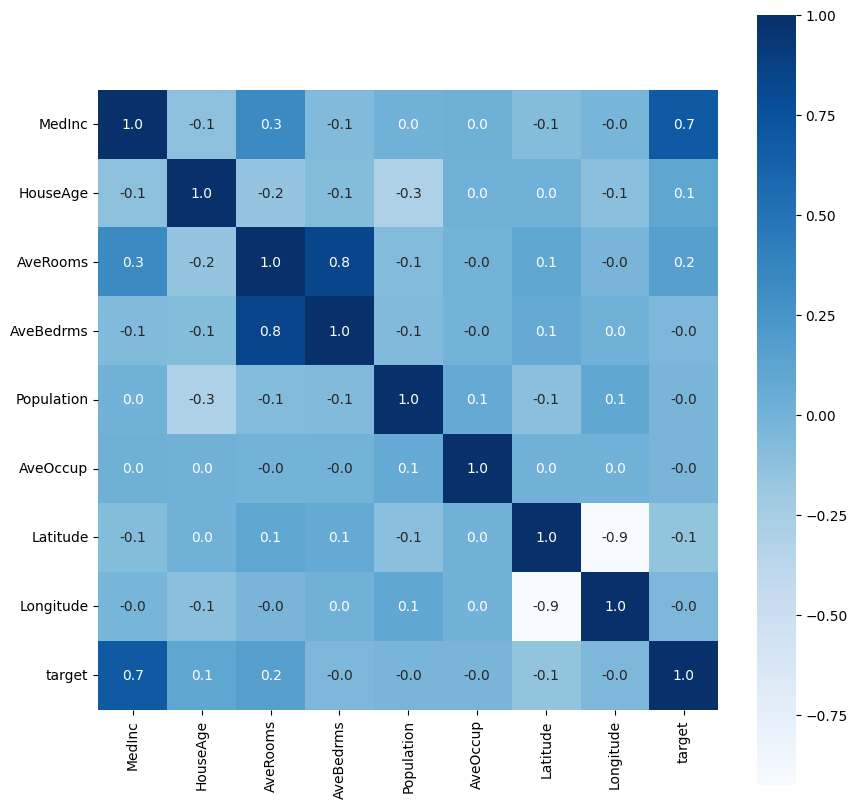

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,fmt=".1f",square=True,cmap='Blues', annot=True)

In [ ]:
X = housing_dataframe.drop('target',axis=1)
y = housing_dataframe['target']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 2)

In [ ]:
print(X_train.shape,X_test.shape)

(16512, 8) (4128, 8)


In [ ]:
model = XGBRegressor()
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
train_data_prediction_values = model.predict(X_train)
train_data_prediction_values

array([0.5523039, 3.0850039, 0.5835302, ..., 1.9204227, 1.952873 ,
       0.6768683], dtype=float32)

In [ ]:
#evalation on basis of rsquared and mean absolute error
score1 = metrics.r2_score(y_train,train_data_prediction_values)
score1

0.943650140819218

In [ ]:
score2 = metrics.mean_absolute_error(y_train,train_data_prediction_values)
score2

0.1933648700612105

In [ ]:
test_data_prediction_values = model.predict(X_test)

In [ ]:
score_test1 = metrics.r2_score(y_test,test_data_prediction_values)
score_test1

0.8338000331788725

### Hyperparameter Tuning with GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize the GridSearchCV object
# We'll use the R-squared score for evaluation
grid_search = GridSearchCV(estimator=XGBRegressor(random_state=42),
                           param_grid=param_grid,
                           scoring='r2',
                           cv=5,  # Use 5-fold cross-validation
                           n_jobs=-1) # Use all available cores

In [ ]:
# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best R-squared score found: ", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

Best parameters found:  {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 300, 'subsample': 1.0}
Best R-squared score found:  0.8429201591297545


### Evaluating the Tuned Model on the Test Data

In [ ]:
# Make predictions on the test data using the best model
test_data_predictions_tuned = best_model.predict(X_test)

In [ ]:
# Evaluate the tuned model
r2_test_tuned = metrics.r2_score(y_test, test_data_predictions_tuned)
mae_test_tuned = metrics.mean_absolute_error(y_test, test_data_predictions_tuned)

print(f"R-squared on Test Data (Tuned Model): {r2_test_tuned}")
print(f"Mean Absolute Error on Test Data (Tuned Model): {mae_test_tuned}")

R-squared on Test Data (Tuned Model): 0.8443599160698344
Mean Absolute Error on Test Data (Tuned Model): 0.2996322270008898


After the grid search is complete, `best_model` will contain the XGBoost Regressor with the optimal hyperparameters found. You can then use this `best_model` to make predictions and evaluate its performance on the test set.

In [ ]:
score_test2 =  metrics.mean_absolute_error(y_test,test_data_prediction_values)
score_test2

0.3108631800268186